In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score




In [2]:
# Read the data 
"""
    The dataset is csv file with 5000 rows and 400 columns.
    The last column is the label of the data : 1,2,3,4,5 as the number of the class.
    The other 400 columns are the pixels of the image.

"""
df_training = pd.read_csv('./dataset/datasetC.csv', header=None)
df_testing = pd.read_csv('./dataset/datasetCTest.csv', header=None)

# X is all the data except the last column
X_training = df_training.iloc[:, :-1]

# y is the last column
y_training = df_training.iloc[:, -1]

1    1129
3    1034
2     992
4     981
5     864
Name: 400, dtype: int64

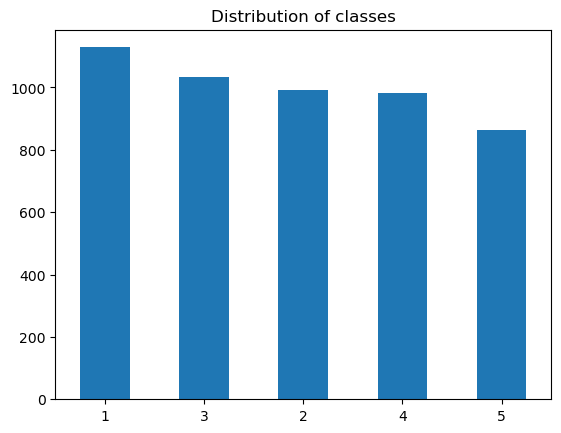

In [3]:
# Class distribution of target variable
y_training.value_counts().plot(kind='bar', title='Distribution of classes', rot=0)
y_training.value_counts()



In [4]:
# Correlation between features
X_training.corr()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1.000000,0.023762,0.011433,0.007512,0.005573,0.015382,0.023929,-0.001405,-0.012774,-0.015448,...,-0.022960,0.004269,-0.010699,-0.021324,-0.009099,0.016734,-0.014984,0.006427,0.032904,-0.024859
1,0.023762,1.000000,0.000873,0.005431,-0.007387,0.000205,0.030547,-0.028660,0.024488,0.009758,...,0.000277,-0.009473,0.008321,0.001057,0.018563,0.005878,-0.011490,0.005029,-0.000419,0.006319
2,0.011433,0.000873,1.000000,0.009807,0.000387,0.031439,0.019733,0.027408,0.024649,0.022179,...,0.003267,-0.010638,0.001114,0.012579,-0.002357,0.011474,0.009268,-0.000021,-0.008952,-0.002589
3,0.007512,0.005431,0.009807,1.000000,-0.017648,0.023699,-0.001217,-0.027083,0.023774,0.011220,...,-0.006812,0.001678,-0.028242,-0.011615,-0.002818,-0.003531,-0.013692,0.001419,0.004088,0.005170
4,0.005573,-0.007387,0.000387,-0.017648,1.000000,-0.008458,0.016542,-0.017832,0.000780,-0.005243,...,-0.016742,0.014445,-0.003528,0.003678,0.027024,0.006217,0.032582,0.008608,-0.006004,-0.013917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.016734,0.005878,0.011474,-0.003531,0.006217,0.016082,-0.000819,0.006685,-0.009395,-0.007702,...,-0.027414,0.019385,0.006103,0.017449,0.030826,1.000000,0.023777,0.029755,0.010168,0.011328
396,-0.014984,-0.011490,0.009268,-0.013692,0.032582,-0.008973,-0.016585,0.014896,-0.007360,-0.010846,...,0.005566,0.001513,0.032207,0.002800,0.026194,0.023777,1.000000,0.032224,0.011362,-0.004897
397,0.006427,0.005029,-0.000021,0.001419,0.008608,0.009302,-0.003393,-0.012857,-0.003396,0.014985,...,-0.001305,0.016944,0.010365,0.014653,-0.003179,0.029755,0.032224,1.000000,0.015493,0.004359
398,0.032904,-0.000419,-0.008952,0.004088,-0.006004,0.002316,0.026576,0.014230,-0.006432,-0.003585,...,-0.000644,0.026662,0.001661,0.008674,0.002670,0.010168,0.011362,0.015493,1.000000,0.003650


In [5]:
# Compute the correlation of each feature with the target
feature_correlation = X_training.apply(lambda x: x.corr(y_training))

# Select features with absolute correlation greater than 0.5 or less than -0.5
corr_features = feature_correlation[abs(feature_correlation) > 0.5].index

print(len(corr_features))

"""
    The correlation between the features is very low.
"""


0


'\n    The correlation between the features is very low.\n'

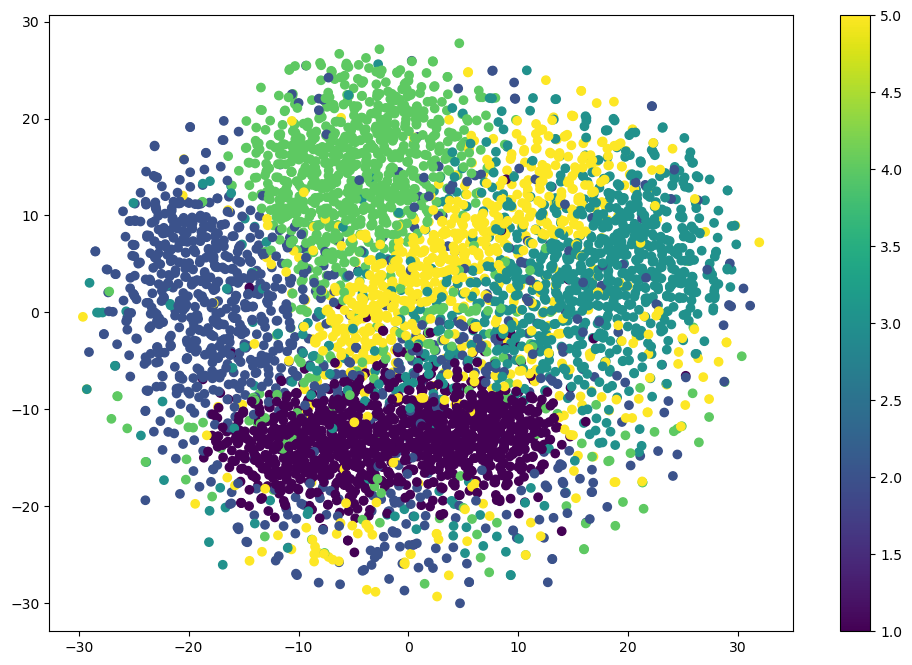

In [7]:
#t-SNE visualization of the data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)    
#X_tsne = tsne.fit_transform(X_training)
X_tsne = tsne.fit_transform(X_training.iloc[:5000, :])

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_training, cmap='viridis')
plt.colorbar()
plt.show()



In [35]:
# # Split the data using stratified k-fold cross validation
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.25, random_state=42)

In [38]:
# # Scaling the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Initialize the model
model = XGBClassifier()

# Initialize the scaler
scaler = StandardScaler()

# List to store each fold's accuracy
accuracies = []

# Shift the classes in y_training to start from 0
y_training = y_training - 1

# Loop over each fold
for train_index, test_index in skf.split(X_training, y_training):
    X_train, X_test = X_training.iloc[train_index], X_training.iloc[test_index]
    y_train, y_test = y_training.iloc[train_index], y_training.iloc[test_index]

    # # Scale the features
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print the mean accuracy
print('Mean accuracy:', np.mean(accuracies))

Mean accuracy: 0.7722


[[214   4   2   1   4]
 [ 25 141  17  12   4]
 [ 22  10 153   5  17]
 [  2   7   5 169  14]
 [ 13   9  31  13 106]]


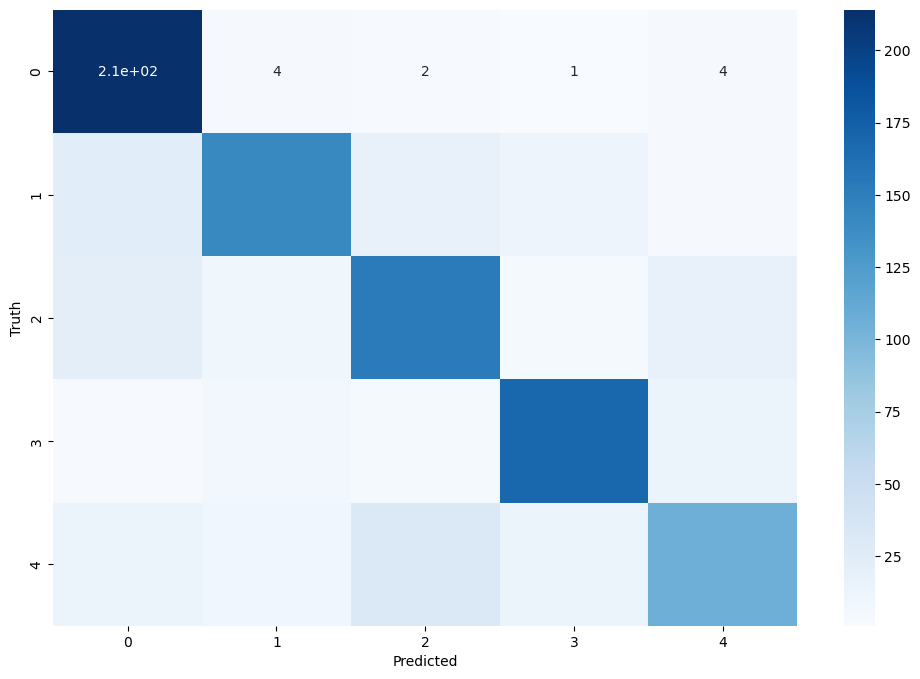

In [11]:
# Accumulative confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [64]:
# baseline model with SVM
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

ovr_clf = OneVsRestClassifier(SVC())

ovr_clf.fit(X_training, y_training)

ovr_clf.predict([X_training.iloc[0]])

len(ovr_clf.estimators_)

cross_val_score(ovr_clf, X_training, y_training, cv=3, scoring='accuracy')

array([0.83023395, 0.85062987, 0.80672269])